# WordCloud Notebook

As mentioned in the deployment notebook, for some reason, this code was not able to execute directly within that Notebook. For now, saving in separate notebook, but relates directly to the deployed dataset.

In [3]:
import pandas as pd
import json
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
review_df = pd.read_csv('../review_df_wordcloud.csv')
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_count,business_rating_avg,prediction_open
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,169,3.0,1
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,144,5.0,1
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,181,4.0,0
3,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,273,4.0,1
4,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,103,3.5,1


In [15]:
review_df[review_df['prediction_open'] ==0]['business_id'].value_counts()

d_tRshM-w6S4QxE4VVi8tQ    23
9gObo5ltOMo6UgsaXaHPWA    19
uIZwBkvWicqyWraXvYOipw    13
Z5po0aTuzKKblek5y6Sp8Q    10
SIoCIxjn4jLt2O-4DajWJw    10
                          ..
qfWJmJ0g96eM_fWma3ja0g     1
o3ca5qJSorYBJCK-S7bVsw     1
J-ciDDEdIHMcChGIyKZnOg     1
vndmRdCChdud7EywJTvy7w     1
8Kw4-lW3-ag4s2s9ELQzgQ     1
Name: business_id, Length: 816, dtype: int64

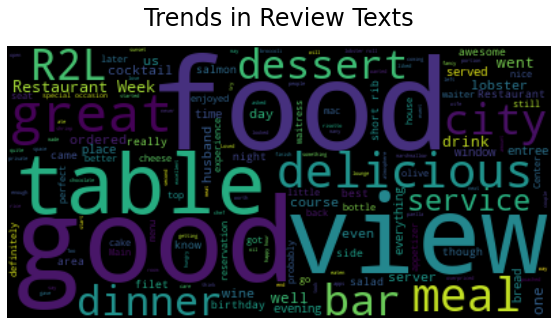

In [17]:
#font_path = 'cambriab.ttf'
business_cloud_id = '9gObo5ltOMo6UgsaXaHPWA'
wordcloud_df = review_df[review_df['business_id'] == business_cloud_id]
wordcloud_text = str(' '.join(wordcloud_df[wordcloud_df['prediction_open'] ==0]['text']))
wordcloud = WordCloud().generate(wordcloud_text) #font_path=font_path

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Trends in Review Texts', size=24, pad=20)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Running a WordCloud on the tips data for businesses in question

In [6]:
# Open the JSON file in read mode
keyword1 = 'text'
keyword2 = 'business_id'
keyword1_list = []
keyword2_list = []
with open('data/yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as tip_file:
    # Initialize the JSON parser
    parser = json.JSONDecoder()

    # Read the file line by line
    for line in tip_file:
        # Parse the JSON data from the current line
        parsed_data, idx = parser.raw_decode(line)

        # Process the parsed data
        # Example: Print the city from each JSON object
        if keyword1 in parsed_data:
            keyword1_list.append(parsed_data[keyword1])
        if keyword2 in parsed_data:
            keyword2_list.append(parsed_data[keyword2])

In [7]:
print('keyword1 list length: '+str(len(keyword1_list)))
print('keyword2 list length: '+str(len(keyword2_list)))

keyword1 list length: 908915
keyword2 list length: 908915


In [11]:
tip_df = pd.DataFrame({'text': keyword1_list, 'business_id': keyword2_list})
tip_df.head()

,text,business_id
0,Avengers time with the ladies.,3uLgwr0qeCNMjKenHJwPGQ
1,They have lots of good deserts and tasty cuban...,QoezRbYQncpRqyrLH6Iqjg
2,It's open even when you think it isn't,MYoRNLb5chwjQe3c_k37Gg
3,Very decent fried chicken,hV-bABTK-glh5wj31ps_Jw
4,Appetizers.. platter special for lunch,_uN0OudeJ3Zl_tf6nxg5ww


In [12]:
tip_df.shape

(908915, 2)

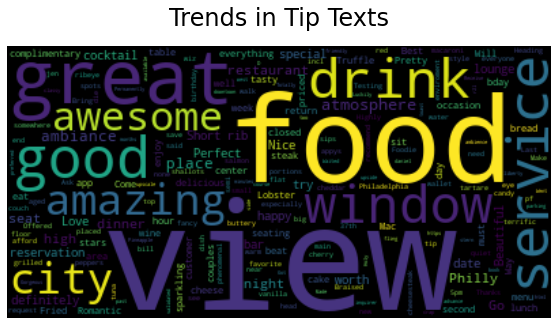

In [18]:
business_cloud_id = '9gObo5ltOMo6UgsaXaHPWA'
wordcloud_df = tip_df[tip_df['business_id'] == business_cloud_id]
wordcloud_text = str(' '.join(wordcloud_df['text']))
wordcloud = WordCloud().generate(wordcloud_text) #font_path=font_path

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Trends in Tip Texts', size=24, pad=20)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()